# Testing EUGENE `predict` module

**Authorship:**
Adam Klie, *03/19/2022*
***
**Description:**
Notebook for testing functionality of EUGENE `predict` module. 

In [6]:
import os
import numpy as np
import pandas as pd

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

import eugene as eu
eu.settings.batch_size = 128
eu.settings.dl_num_workers = 4
eu.settings.logging_dir = "/cellar/users/aklie/projects/EUGENE/tests/_logs/"
eu.settings.datasetdir = "/cellar/users/aklie/projects/EUGENE/tests/_data/datasets/"

# Predictions with a EUGENE model


## Load data

In [28]:
sdataframe = eu.dl.read("/cellar/users/aklie/projects/EUGENE/tests/_data/datasets/random1000_10/random1000_10_seqs.tsv", return_dataframe=True)

In [31]:
sdata = eu.dl.SeqData(seqs=sdataframe["SEQ"], seqs_annot=sdataframe.drop(columns=["NAME", "SEQ"]))

In [33]:
sdata.seqs_annot

,LABEL_0,LABEL_1,LABEL_2,LABEL_3,LABEL_4,LABEL_5,LABEL_6,LABEL_7,LABEL_8,LABEL_9,ACTIVITY_0,ACTIVITY_1,ACTIVITY_2,ACTIVITY_3,ACTIVITY_4,ACTIVITY_5,ACTIVITY_6,ACTIVITY_7,ACTIVITY_8,ACTIVITY_9
seq000,0,0,1,1,0,1,0,0,1,0,0.948934,0.092188,0.986719,0.196594,0.403155,0.371678,0.042289,0.927241,0.485124,0.640674
seq001,1,1,0,0,1,0,0,0,0,1,0.817923,0.018528,0.015228,0.003718,0.598260,0.730317,0.317898,0.463175,0.839338,0.127983
seq002,0,0,1,1,0,0,0,0,0,1,0.450336,0.914801,0.560493,0.877248,0.845403,0.593664,0.126277,0.879596,0.340810,0.124606
seq003,0,1,1,1,0,1,0,1,0,1,0.586024,0.900261,0.091969,0.095967,0.619620,0.655565,0.292059,0.877301,0.645095,0.459019
seq004,0,1,0,1,1,0,0,1,1,1,0.001591,0.965011,0.042403,0.524665,0.036034,0.590756,0.379387,0.486074,0.762880,0.481825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
seq995,1,1,1,1,0,1,0,0,0,0,0.922323,0.137508,0.418520,0.416747,0.408811,0.362111,0.391182,0.521027,0.791716,0.546884
seq996,1,1,0,0,1,0,1,1,0,1,0.501869,0.990066,0.015208,0.053195,0.273434,0.652063,0.982409,0.172771,0.663901,0.588118
seq997,0,0,0,1,0,1,1,0,0,0,0.255555,0.154190,0.197302,0.663516,0.320932,0.501015,0.846163,0.690797,0.181287,0.567035
seq998,0,1,0,0,0,1,1,1,1,0,0.933042,0.415456,0.548859,0.965423,0.252673,0.529924,0.686661,0.475059,0.172517,0.541237


In [34]:
eu.pp.prepare_data(sdata)

  0%|          | 0/3 [00:00<?, ?it/s]

SeqData object modified:
	rev_seqs: None -> 1000 rev_seqs added
	ohe_seqs: None -> 1000 ohe_seqs added
	ohe_rev_seqs: None -> 1000 ohe_rev_seqs added
    seqs_annot:
        + TRAIN


In [35]:
sdata

SeqData object with = 1000 seqs
seqs = (1000,)
names = None
rev_seqs = (1000,)
ohe_seqs = (1000, 66, 4)
ohe_rev_seqs = (1000, 66, 4)
seqs_annot: 'LABEL_0', 'LABEL_1', 'LABEL_2', 'LABEL_3', 'LABEL_4', 'LABEL_5', 'LABEL_6', 'LABEL_7', 'LABEL_8', 'LABEL_9', 'ACTIVITY_0', 'ACTIVITY_1', 'ACTIVITY_2', 'ACTIVITY_3', 'ACTIVITY_4', 'ACTIVITY_5', 'ACTIVITY_6', 'ACTIVITY_7', 'ACTIVITY_8', 'ACTIVITY_9', 'TRAIN'
pos_annot: None
seqsm: None
uns: None

In [20]:
eugene = eu.models.DeepBind(input_len=66, output_dim=2)
eu.models.base.init_weights(eugene)

In [60]:
from pytorch_lightning import Trainer

In [67]:
train_predictor = Trainer(logger=False, gpus=1)

Global seed set to 13


GPU is available: True
Number of GPUs: 1
Current GPU: 0
GPUs: Quadro RTX 5000


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [69]:
sdataset = sdata.to_dataset(label=["TARGETS", "TARGETS_2"], seq_transforms=None, transform_kwargs={"transpose": True})
sdataloader = sdataset.to_dataloader(batch_size=eu.settings.batch_size, num_workers=eu.settings.dl_num_workers)

No transforms given, assuming just need to tensorize).


In [70]:
sdataset[0]

(tensor([115., 101., 113.,  48.,  48.,  48.]),
 tensor([[1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
          0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
          1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
          0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
          0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
          1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
         [0., 0., 0., 0., 0., 0., 0., 

In [91]:
ps = np.concatenate(train_predictor.predict(eugene, sdataloader), axis=0)
num_outs = eugene.output_dim
preds = pd.DataFrame(index=ps[:, 0], data=ps[:, 1:num_outs+1])

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/cellar/users/aklie/opt/miniconda3/envs/eugene/lib/python3.7/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."


Predicting: 0it [00:00, ?it/s]

In [92]:
preds

,0,1
seq000,-0.25485528,0.41812295
seq001,-0.25355616,0.41248086
seq002,-0.25532126,0.41644055
seq003,-0.2490508,0.4100547
seq004,-0.25616804,0.416713
...,...,...
seq995,-0.2533257,0.41629857
seq996,-0.25364217,0.41560835
seq997,-0.24865219,0.41150454
seq998,-0.25864846,0.4202541


In [93]:
labels = ["TARGETS", "TARGETS_2"]

In [94]:
sdata.seqs_annot[[f"{label}_PREDICTIONS" for label in labels]] = preds.loc[sdata.seqs_annot.index].astype(float)

In [96]:
sdata.seqs_annot

Global seed set to 13


,TARGETS,TRAIN,TARGETS_2,TARGETS_PREDICTIONS,TARGETS_2_PREDICTIONS
seq000,0.866168,True,0.866168,-0.254855,0.418123
seq001,0.800737,True,0.800737,-0.253556,0.412481
seq002,0.703108,True,0.703108,-0.255321,0.416441
seq003,0.465782,False,0.465782,-0.249051,0.410055
seq004,0.676781,False,0.676781,-0.256168,0.416713
...,...,...,...,...,...
seq995,0.001721,True,0.001721,-0.253326,0.416299
seq996,0.617911,True,0.617911,-0.253642,0.415608
seq997,0.565960,True,0.565960,-0.248652,0.411505
seq998,0.293470,True,0.293470,-0.258648,0.420254


In [88]:
preds.loc[sdata.seqs_annot.index].astype(float)

,0,1,2,3
seq000,-0.254855,0.418123,0.866168,0.866168
seq001,-0.253556,0.412481,0.800737,0.800737
seq002,-0.255321,0.416441,0.703108,0.703108
seq003,-0.249051,0.410055,0.465782,0.465782
seq004,-0.256168,0.416713,0.676781,0.676781
...,...,...,...,...
seq995,-0.253326,0.416299,0.001721,0.001721
seq996,-0.253642,0.415608,0.617911,0.617911
seq997,-0.248652,0.411505,0.565960,0.565960
seq998,-0.258648,0.420254,0.293470,0.293470


In [87]:
[f"{label}_PREDICTIONS" for label in labels]

['TARGETS_PREDICTIONS', 'TARGETS_2_PREDICTIONS']

In [9]:
OUT_DIR = "/cellar/users/aklie/projects/EUGENE/tests/_out/"

In [22]:
eu.predict.predictions(eugene, sdata=sdata, target_label=["TARGETS", "TARGETS_2"], out_dir=OUT_DIR, label="Multitask_test")

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


['TARGETS', 'TARGETS_2']
No transforms given, assuming just need to tensorize).


Predicting: 0it [00:00, ?it/s]

2
SeqData object modified:
    seqs_annot:
        + TARGETS_PREDICTIONS, TARGETS_2_PREDICTIONS


In [24]:
sdata.seqs_annot

,TARGETS,TRAIN,TARGETS_2,TARGETS_PREDICTIONS,TARGETS_2_PREDICTIONS
seq000,0.866168,True,0.866168,-0.354305,-0.135588
seq001,0.800737,True,0.800737,-0.354913,-0.134000
seq002,0.703108,True,0.703108,-0.355471,-0.132544
seq003,0.465782,False,0.465782,-0.354902,-0.134031
seq004,0.676781,False,0.676781,-0.354795,-0.134310
...,...,...,...,...,...
seq995,0.001721,True,0.001721,-0.355461,-0.132571
seq996,0.617911,True,0.617911,-0.354815,-0.134256
seq997,0.565960,True,0.565960,-0.355405,-0.132717
seq998,0.293470,True,0.293470,-0.354941,-0.133928


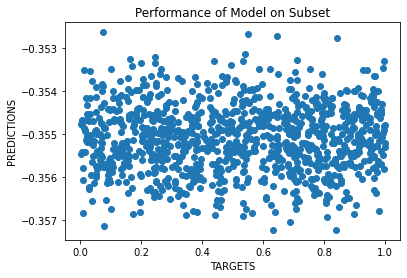

In [26]:
eu.pl.performance_scatter(sdata, target="TARGETS", prediction="TARGETS_PREDICTIONS")

In [100]:
sdata.seqs_anno

,TARGETS,TRAIN,TARGETS_2,TARGETS_PREDICTIONS,TARGETS_2_PREDICTIONS,_PREDICTIONS
seq000,0.866168,True,0.866168,-0.254855,0.418123,-0.254855
seq001,0.800737,True,0.800737,-0.253556,0.412481,-0.253556
seq002,0.703108,True,0.703108,-0.255321,0.416441,-0.255321
seq003,0.465782,False,0.465782,-0.249051,0.410055,-0.249051
seq004,0.676781,False,0.676781,-0.256168,0.416713,-0.256168
...,...,...,...,...,...,...
seq995,0.001721,True,0.001721,-0.253326,0.416299,-0.253326
seq996,0.617911,True,0.617911,-0.253642,0.415608,-0.253642
seq997,0.565960,True,0.565960,-0.248652,0.411505,-0.248652
seq998,0.293470,True,0.293470,-0.258648,0.420254,-0.258648


In [46]:
eu.predict.train_val_predictions(eugene, sdata=sdata, out_dir=OUT_DIR)

Global seed set to 13
GPU available: True, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: True, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


No transforms given, assuming just need to tensorize).
No transforms given, assuming just need to tensorize).
HERE
/cellar/users/aklie/projects/EUGENE/tests/_out/


Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

/cellar/users/aklie/opt/miniconda3/envs/eugene/lib/python3.7/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."


Predicting: 0it [00:00, ?it/s]

[array([['seq000', '-0.15133198', '0.8661678'],
        ['seq001', '-0.15154625', '0.80073655'],
        ['seq002', '-0.15077066', '0.70310766'],
        ['seq003', '-0.15122041', '0.46578205'],
        ['seq004', '-0.15123816', '0.67678136'],
        ['seq005', '-0.15135649', '0.3103137'],
        ['seq006', '-0.15161407', '0.9545735'],
        ['seq007', '-0.15134868', '0.0041322224'],
        ['seq008', '-0.15048636', '0.030238718'],
        ['seq009', '-0.15142497', '0.319772'],
        ['seq010', '-0.1510559', '0.2921183'],
        ['seq011', '-0.15125656', '0.43328607'],
        ['seq012', '-0.15126145', '0.68405265'],
        ['seq013', '-0.15079421', '0.044147745'],
        ['seq014', '-0.15156557', '0.7824166'],
        ['seq015', '-0.15081376', '0.47775027'],
        ['seq016', '-0.1504286', '0.2551437'],
        ['seq017', '-0.15116882', '0.4286281'],
        ['seq018', '-0.15116559', '0.9173743'],
        ['seq019', '-0.15107928', '0.24097292'],
        ['seq020', '-0.15073

In [37]:
sdata.seqs_annot

,TARGETS,TRAIN,TARGETS_PREDICTIONS
seq000,0.866168,True,-0.151332
seq001,0.800737,True,-0.151546
seq002,0.703108,True,-0.150771
seq003,0.465782,False,-0.151220
seq004,0.676781,False,-0.151238
...,...,...,...
seq995,0.001721,True,-0.151018
seq996,0.617911,True,-0.151245
seq997,0.565960,True,-0.151062
seq998,0.293470,True,-0.150945


---

# Scratch